# 효율적 투자 전략
* 대상 종목 : 주식, 채권

In [1]:
from IPython.display import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings(action='ignore')
sns.set()

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
#plt.rc('font', family='NanumGothicOTF') # For MacOS
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False


#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
from IPython.core.display import display, HTML
display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)



# DataLoad

In [2]:
sdf = pd.read_csv("./datasets/kodex_stock.csv")
bdf = pd.read_csv("./datasets/kodex_bond10y.csv")

In [3]:
sdf.shape, bdf.shape

((1845, 6), (1845, 6))

In [4]:
sdf = sdf.set_index("dt")
sdf.head(2)

,close,high,low,open,volume
dt,,,,,
2012-01-20,49960.0,50040.0,49960.0,50040.0,3276.0
2012-01-25,49960.0,49960.0,49960.0,49960.0,100.0


In [5]:
bdf = bdf.set_index("dt")
bdf.head(2)

,close,high,low,open,volume
dt,,,,,
2012-01-20,23197.4,23264.1,22801.9,22833.0,5205309.5
2012-01-25,23277.4,23539.6,23161.9,23197.4,7721437.0


# df

In [6]:
sdf = pd.DataFrame(sdf["close"])
sdf = sdf.rename(columns={'close': 'stock'})
sdf.head(1)

,stock
dt,
2012-01-20,49960.0


In [7]:
bdf = pd.DataFrame(bdf["close"])
bdf = bdf.rename(columns={'close': 'bond'})
bdf.head(1)

,bond
dt,
2012-01-20,23197.4


In [8]:
df  =pd.concat([sdf, bdf], axis=1)
df.head(2)

,stock,bond
dt,,
2012-01-20,49960.0,23197.4
2012-01-25,49960.0,23277.4


<!-- # 수익률 -->

In [ ]:
# df["stock"] = df["stock"].pct_change()
# df["bond"] = df["bond"].pct_change()
# df = df.dropna()
# df.head(3)

In [ ]:
# annual_stock_ret = df["stock"].mean() *252
# annual_bond_ret = df["bond"].mean() *252
# annual_stock_ret, annual_bond_ret

<!-- # 공분산행렬 -->

In [ ]:
# cov = df.cov()
# cov

In [ ]:
# annual_cov = cov * 252
# annual_cov

In [ ]:
# len(df.columns)

# 수익률, 위험성

In [33]:
stocks = df.columns

daily_ret  = df.pct_change()
annual_ret = daily_ret.mean() * 252
daily_cov  = daily_ret.cov()
annual_cov = daily_ret.cov() * 252

port_return = []
port_risk   = []
port_weight = []
port_sharpe = []

for _ in range(20000):
    weights  = np.random.random(len(stocks))
    weights /= np.sum(weights)
    
    returns = np.dot(weights,annual_ret)
    risk    = np.dot(np.dot(weights, annual_cov),weights.T)
    sharpe  = returns/risk
    
    port_return.append(returns)
    port_risk.append(risk)
    port_weight.append(weights)
    port_sharpe.append(sharpe)
    
portfolio = {"port_return":port_return,"port_risk":port_risk, "port_sharpe":port_sharpe }
for i, s in enumerate(stocks):
    portfolio[s] = [weight[i] for weight in port_weight] 
pt_df = pd.DataFrame(portfolio)



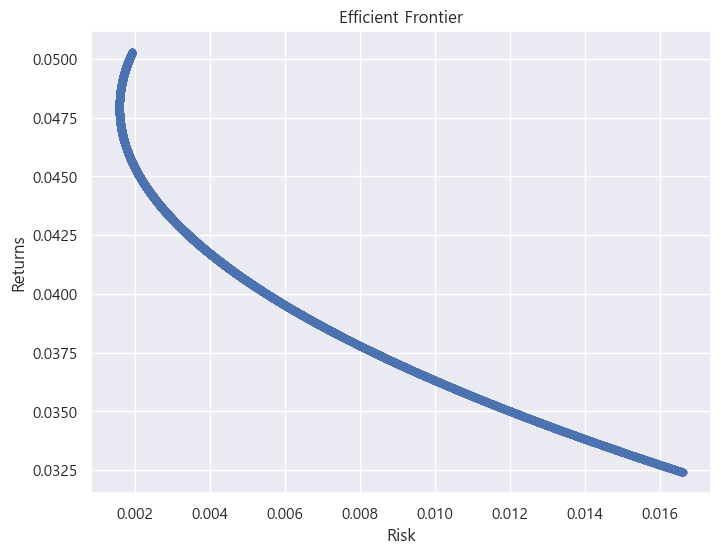

In [25]:
pt_df.plot.scatter(x='port_risk', y='port_return', figsize=(8, 6), grid=True)
plt.title('Efficient Frontier') 
plt.xlabel('Risk') 
plt.ylabel('Returns') 
plt.show() 

# 효율적 투자

## 샤프지수 최대

In [35]:
sharpe_max = pt_df[pt_df["port_sharpe"] ==pt_df["port_sharpe"].max()]
sharpe_max

,port_return,port_risk,port_sharpe,stock,bond
3650,0.048209,0.001586,30.402765,0.88368,0.11632


## 위험 최소

In [36]:
risk_min = pt_df[pt_df["port_risk"] ==pt_df["port_risk"].min()]
risk_min

,port_return,port_risk,port_sharpe,stock,bond
4605,0.047945,0.001581,30.31929,0.868877,0.131123


## 수익 최대

In [37]:
return_max = pt_df[pt_df["port_return"] ==pt_df["port_return"].max()]
return_max

,port_return,port_risk,port_sharpe,stock,bond
1891,0.050283,0.001922,26.162648,0.999655,0.000345


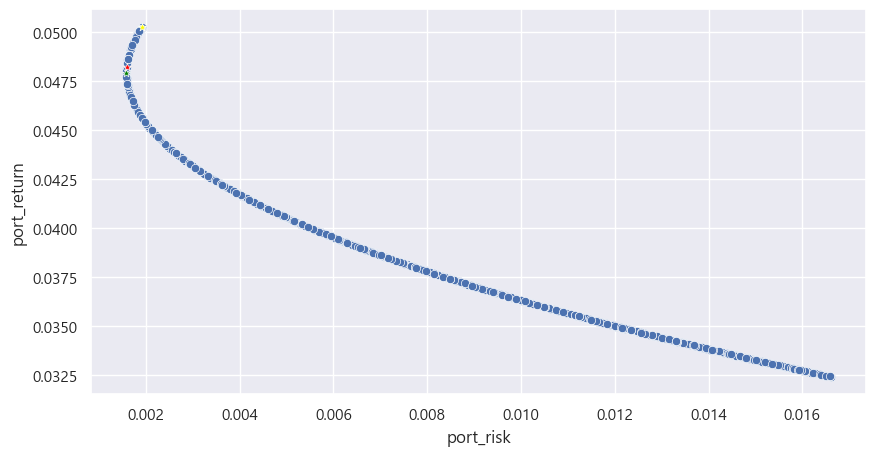

In [40]:
plt.figure(figsize=(10,5))
sns.scatterplot(pt_df, x="port_risk",y="port_return")
sns.scatterplot(sharpe_max, x="port_risk",y="port_return",marker="*", c="red")      # 샤프지수 최대  : 빨간별
sns.scatterplot(risk_min, x="port_risk",y="port_return",marker="*", c="green")      # 위험 최소      : 초록별
sns.scatterplot(return_max, x="port_risk",y="port_return",marker="*", c="yellow")   #  수익 최대     : 노란별
plt.show()